In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d22c3a7bc5aacca8fd96c1c53bc614c0


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint anthony
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | rabo de peixe
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | pangoa
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | burica
City not found. Skipping...
Processing Record 12 of Set 1 | qasigiannguit
Processing Record 13 of Set 1 | grand gaube
Processing Record 14 of Set 1 | magadan
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | quimper
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | marang
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | cayenne


Processing Record 36 of Set 4 | winnemucca
Processing Record 37 of Set 4 | tromso
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 40 of Set 4 | ust-bolsheretsk
City not found. Skipping...
Processing Record 41 of Set 4 | sioux lookout
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | goderich
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | vydrino
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | mardin
Processing Record 50 of Set 4 | myitkyina
Processing Record 1 of Set 5 | bilma
Processing Record 2 of Set 5 | petropavlivka
Processing Record 3 of Set 5 | todos santos
Processing Record 4 of Set 5 | paamiut
Processing Record 5 of Set 5 | kishi
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | andros town
Processing Record 8 of Set

Processing Record 21 of Set 8 | brooks
Processing Record 22 of Set 8 | dukat
Processing Record 23 of Set 8 | la ronge
Processing Record 24 of Set 8 | barcelos
Processing Record 25 of Set 8 | sohag
Processing Record 26 of Set 8 | serik
Processing Record 27 of Set 8 | fairbanks
Processing Record 28 of Set 8 | jalu
Processing Record 29 of Set 8 | sitka
Processing Record 30 of Set 8 | manisa
Processing Record 31 of Set 8 | nizhnyaya omka
Processing Record 32 of Set 8 | capreol
Processing Record 33 of Set 8 | kamina
Processing Record 34 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 8 | teya
Processing Record 36 of Set 8 | uyovu
Processing Record 37 of Set 8 | santo antonio do ica
Processing Record 38 of Set 8 | praia
Processing Record 39 of Set 8 | kaspiyskiy
Processing Record 40 of Set 8 | mosina
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | havelock
Processing Record 43 of Set 8 | steinheim
Processing Record 44 of Set 8 | jiayuguan


Processing Record 10 of Set 12 | coihaique
Processing Record 11 of Set 12 | ayan
Processing Record 12 of Set 12 | port blair
Processing Record 13 of Set 12 | olstykke
Processing Record 14 of Set 12 | lichuan
Processing Record 15 of Set 12 | hailey
Processing Record 16 of Set 12 | labutta
City not found. Skipping...
Processing Record 17 of Set 12 | ilave
Processing Record 18 of Set 12 | itarema
Processing Record 19 of Set 12 | tignere
Processing Record 20 of Set 12 | port said
Processing Record 21 of Set 12 | smirnykh
Processing Record 22 of Set 12 | northam
Processing Record 23 of Set 12 | hornepayne
Processing Record 24 of Set 12 | natal
Processing Record 25 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 26 of Set 12 | kamaishi
Processing Record 27 of Set 12 | loikaw
Processing Record 28 of Set 12 | marsala
Processing Record 29 of Set 12 | termoli
Processing Record 30 of Set 12 | banda aceh
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 

In [11]:
len(city_data)

535

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.0205,-93.2180,48.20,53,1,13.80,US,2021-03-02 22:54:00
1,Georgetown,5.4112,100.3354,78.80,88,40,4.61,MY,2021-03-02 22:55:43
2,Rikitea,-23.1203,-134.9692,78.08,69,68,0.81,PF,2021-03-02 22:51:57
3,Rabo De Peixe,37.8000,-25.5833,59.00,88,20,20.71,PT,2021-03-02 22:55:43
4,Punta Arenas,-53.1500,-70.9167,59.00,38,0,14.97,CL,2021-03-02 22:55:43
5,Ponta Do Sol,32.6667,-17.1000,55.99,62,55,5.01,PT,2021-03-02 22:52:07
6,Vaini,-21.2000,-175.2000,73.40,94,90,12.66,TO,2021-03-02 22:52:01
7,Pangoa,-12.1167,-73.0000,73.69,87,94,1.72,PE,2021-03-02 22:53:08
8,Saldanha,-33.0117,17.9442,64.40,88,0,3.44,ZA,2021-03-02 22:55:44
9,Yellowknife,62.4560,-114.3525,-2.00,71,75,11.50,CA,2021-03-02 22:52:20


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint Anthony,US,2021-03-02 22:54:00,45.0205,-93.2180,48.20,53,1,13.80
1,Georgetown,MY,2021-03-02 22:55:43,5.4112,100.3354,78.80,88,40,4.61
2,Rikitea,PF,2021-03-02 22:51:57,-23.1203,-134.9692,78.08,69,68,0.81
3,Rabo De Peixe,PT,2021-03-02 22:55:43,37.8000,-25.5833,59.00,88,20,20.71
4,Punta Arenas,CL,2021-03-02 22:55:43,-53.1500,-70.9167,59.00,38,0,14.97
5,Ponta Do Sol,PT,2021-03-02 22:52:07,32.6667,-17.1000,55.99,62,55,5.01
6,Vaini,TO,2021-03-02 22:52:01,-21.2000,-175.2000,73.40,94,90,12.66
7,Pangoa,PE,2021-03-02 22:53:08,-12.1167,-73.0000,73.69,87,94,1.72
8,Saldanha,ZA,2021-03-02 22:55:44,-33.0117,17.9442,64.40,88,0,3.44
9,Yellowknife,CA,2021-03-02 22:52:20,62.4560,-114.3525,-2.00,71,75,11.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

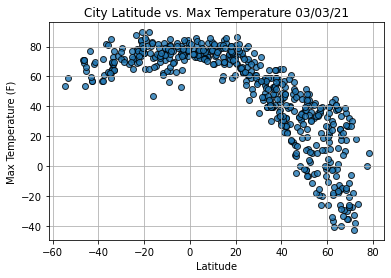

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

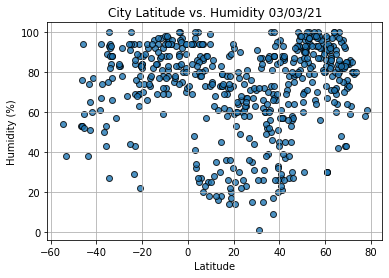

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

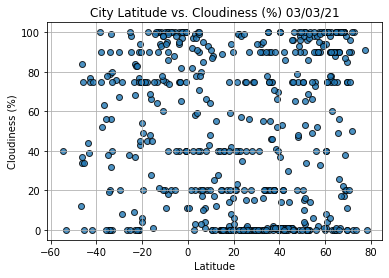

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

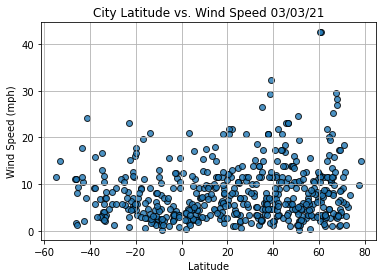

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()